# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

In [2]:
file = "data.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(file)
dataset.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Preprocessing

In [3]:
X = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, 14].values

## Train, Validation and Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.2, random_state = 109)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state = 10)

# Fourth: Using the Decision Tree classifier

## Model Development and Hyperparameter Tuning Using the Validation Set

In [5]:
# import the class
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
dtc = DecisionTreeClassifier(min_samples_split=100)
# fit the model with data
dtc.fit(X_train,y_train)

y_pred=dtc.predict(X_valid)

## Model Evaluation and Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

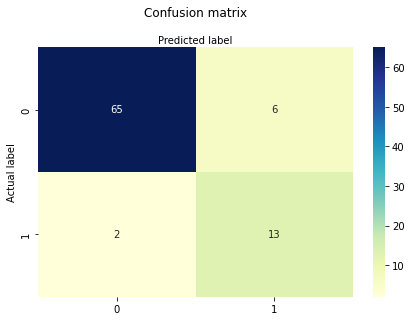

In [6]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Testing the Model on the Test Set

Text(0.5, 257.44, 'Predicted label')

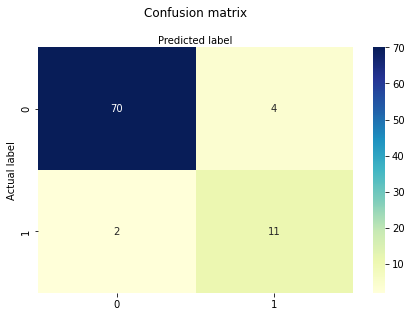

In [7]:
y_pred=dtc.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.73      0.85      0.79        13

    accuracy                           0.93        87
   macro avg       0.85      0.90      0.87        87
weighted avg       0.94      0.93      0.93        87



## ROC Curve

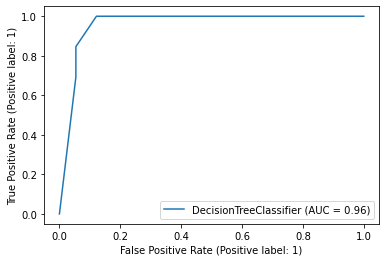

In [9]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc, X_test, y_test)
plt.show()

# Visualizing Decision Trees

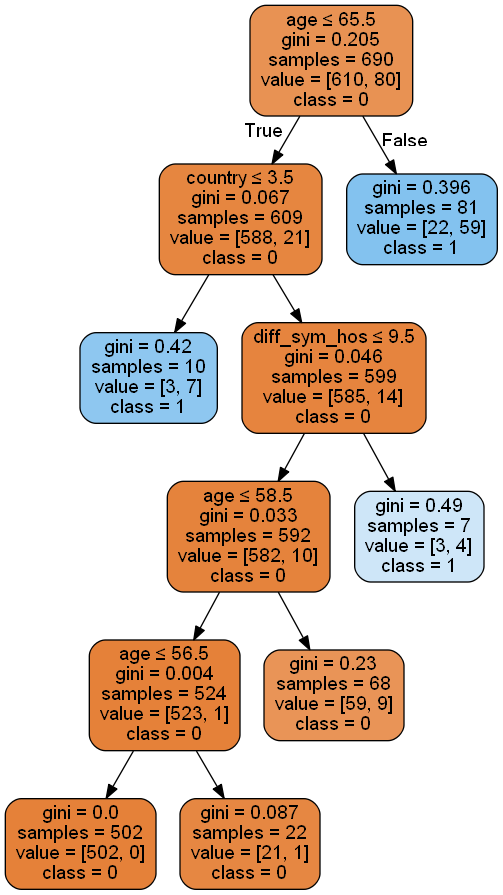

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ["location", "country", "gender", "age", "vis_wuhan", "from_wuhan", "symptom1", "symptom2", "symptom3", "symptom4", "symptom5", "symptom6", "diff_sym_hos"]
dot_data = StringIO()
export_graphviz(dtc, out_file = dot_data, rounded = True, filled = True, special_characters = True, feature_names = feature_cols, class_names = ["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Play Tennis_1.png")
Image(graph.create_png())

# Fifth: Using the Support Vector Machine classifier

## Model Development and Hyperparameter Tuning Using the Validation Set

In [11]:
# import the class
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# instantiate the model
rbf_kernel_svm_clf = Pipeline ([("scaler", StandardScaler()), ("svm_clf", SVC(C=500))])
# fit the model with data
rbf_kernel_svm_clf.fit(X_train,y_train)

y_pred=rbf_kernel_svm_clf.predict(X_valid)

## Model Evaluation and Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

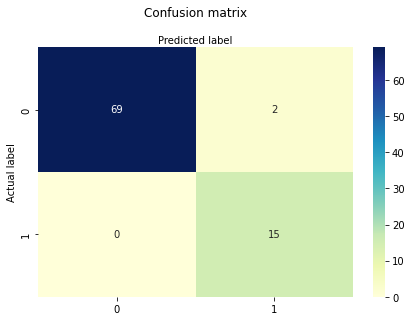

In [12]:
cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Testing the Model on the Test Set

Text(0.5, 257.44, 'Predicted label')

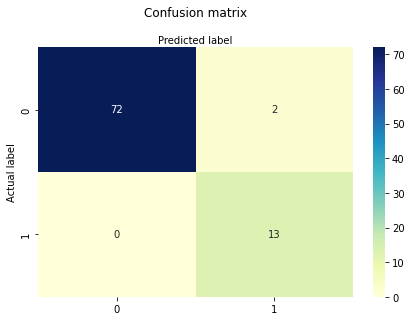

In [13]:
y_pred=rbf_kernel_svm_clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.87      1.00      0.93        13

    accuracy                           0.98        87
   macro avg       0.93      0.99      0.96        87
weighted avg       0.98      0.98      0.98        87



## ROC Curve

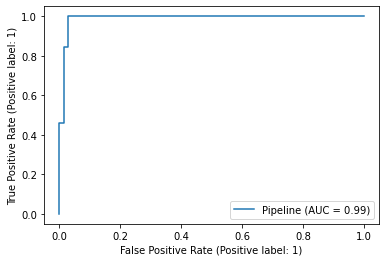

In [15]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rbf_kernel_svm_clf, X_test, y_test)
plt.show()